In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# 1. Load the dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 2. Make 'PassengerId' as index column
data = pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset.csv",index_col = 'PassengerId' )

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 3. Check the basic details of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.shape

(891, 11)

In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 4. Fill the Missing Values

In [20]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [22]:
data['Age'].isna().sum()

0

In [24]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [26]:
data['Cabin'].isna().sum()

0

In [28]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [30]:
data['Embarked'].isna().sum()

0

In [32]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### Outlier Detection

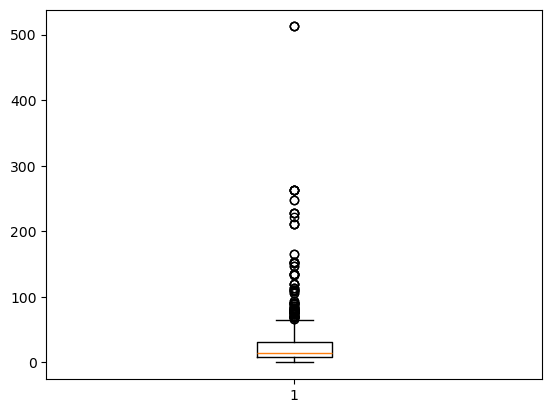

In [35]:
# Check and handle outliers
plt.boxplot(data['Fare'])
plt.show()

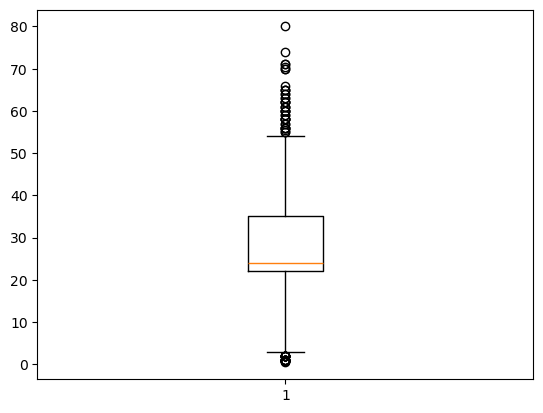

In [37]:
plt.boxplot(data['Age'])
plt.show()

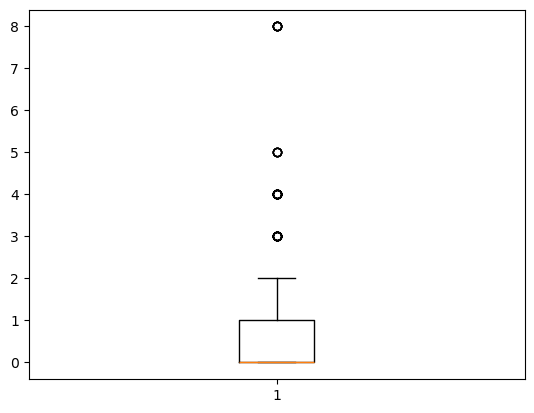

In [39]:
plt.boxplot(data['SibSp'])
plt.show()

#### Outlier Handling of Column Age

In [42]:
Q1 = np.percentile(data['Age'],25)

In [44]:
Q1

22.0

In [46]:
Q2 = np.percentile(data['Age'],50)

In [48]:
Q2

24.0

In [50]:
Q3 = np.percentile(data['Age'],75)

In [52]:
Q3

35.0

In [54]:
IQR = Q3-Q1

In [56]:
IQR

13.0

In [58]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [60]:
lower_limit

2.5

In [62]:
upper_limit

54.5

In [64]:
outlier = []
for x in data['Age']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)

In [66]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [68]:
ind1 = data['Age']>upper_limit
ind2 = data['Age']<lower_limit
loca1 = data.loc[ind1].index
loca2 = data.loc[ind2].index

In [70]:
loca1

Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253, 269,
       276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546, 556, 571,
       588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880],
      dtype='int64', name='PassengerId')

In [72]:
loca2

Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387, 470,
       480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
      dtype='int64', name='PassengerId')

In [74]:
data.drop(loca1, inplace = True)
data.drop(loca2, inplace = True)

In [76]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [78]:
data.shape

(825, 11)

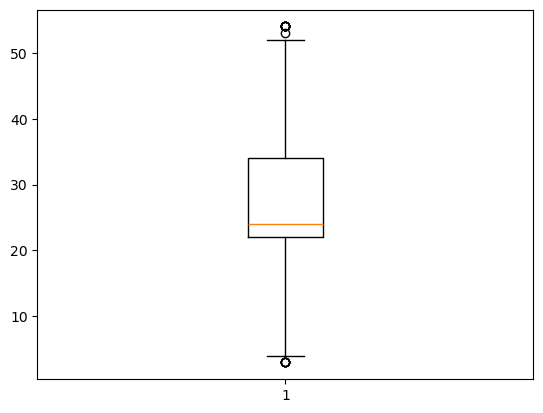

In [80]:
plt.boxplot(data['Age'])
plt.show()

#### OUtlier Handling of Column SibSp

In [83]:
Q1 = np.percentile(data['SibSp'],25)

In [85]:
Q1

0.0

In [87]:
Q2 = np.percentile(data['SibSp'],50)

In [89]:
Q2

0.0

In [91]:
Q3 = np.percentile(data['SibSp'],75)

In [93]:
Q3

1.0

In [95]:
IQR = Q3 - Q1

In [97]:
IQR

1.0

In [99]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [101]:
upper_limit

2.5

In [103]:
lower_limit

-1.5

In [105]:
outlier = []
for x in data['SibSp']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)

In [107]:
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [109]:
ind = data['SibSp']>upper_limit
loca = data.loc[ind].index

In [111]:
loca

Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181, 183,
       202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486, 542, 543,
       635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
      dtype='int64', name='PassengerId')

In [113]:
data.drop(loca, inplace = True)

In [115]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [117]:
data.shape

(786, 11)

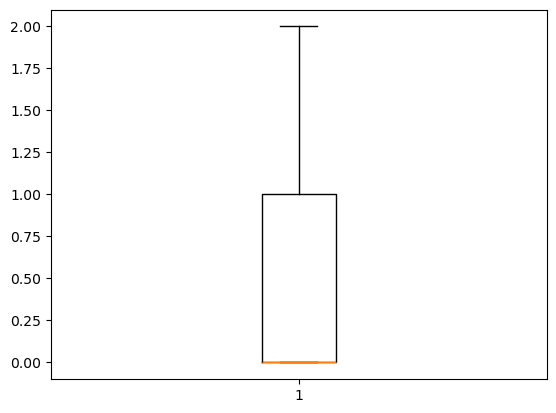

In [119]:
plt.boxplot(data['SibSp'])
plt.show()

#### Oulier Handling of column Fare

In [122]:
Q1 = np.percentile(data['Fare'],25)

In [124]:
Q1

7.8958

In [126]:
Q2 = np.percentile(data['Fare'],50)

In [128]:
Q2

13.0

In [130]:
Q3 = np.percentile(data['Fare'],75)

In [132]:
 Q3

27.75

In [134]:
IQR = Q3 - Q1

In [136]:
IQR

19.8542

In [138]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [140]:
upper_limit

57.5313

In [142]:
lower_limit

-21.885499999999997

In [144]:
outlier = []
for x in data['Fare']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)

In [146]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [162]:
ind = data['Fare']>upper_limit
loca = data.loc[ind].index

In [164]:
loca

Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
       ...
       760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
      dtype='int64', name='PassengerId', length=102)

In [166]:
data.drop(loca, inplace = True)

In [168]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,B96 B98,Q


In [170]:
data.shape

(684, 11)

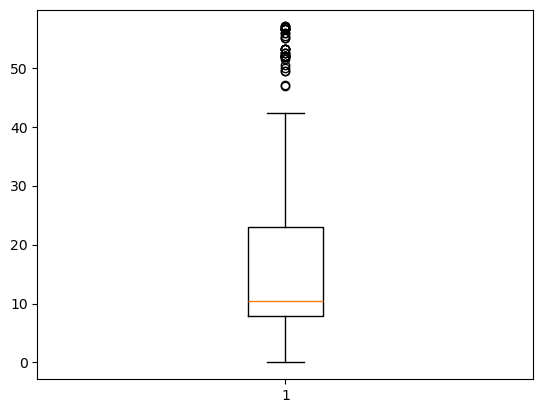

In [172]:
plt.boxplot(data['Fare'])
plt.show()

#### Do MinMax Scaling

In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [176]:
x = data

In [178]:
x['Embarked'] = le.fit_transform(x['Embarked'])

In [180]:
x['Sex'] = le.fit_transform(x['Sex'])

In [182]:
x.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2
6,0,3,"Moran, Mr. James",1,24.0,0,0,330877,8.4583,B96 B98,1


In [184]:
x = data.drop(['Name','Ticket','Cabin','Survived'],axis=1)

In [186]:
y = data['Survived']

In [190]:
y.head()

PassengerId
1    0
3    1
4    1
5    0
6    0
Name: Survived, dtype: int64

In [192]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
6,3,1,24.0,0,0,8.4583,1


In [194]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [196]:
scaled_features = scaler.fit_transform(x)

In [198]:
data_scaled = pd.DataFrame(scaled_features,columns=x.columns)

In [200]:
data_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.372549,0.5,0.0,0.127193,1.0
1,1.0,0.0,0.450980,0.0,0.0,0.139035,1.0
2,0.0,0.0,0.627451,0.5,0.0,0.931579,1.0
3,1.0,1.0,0.627451,0.0,0.0,0.141228,1.0
4,1.0,1.0,0.411765,0.0,0.0,0.148391,0.5
